In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Preprocessing

This dataset contains informations about employees and their salaries

The columns in data set are given as follow:
*   Age
*   Gender
*   Education Level
*   Job Title
*   Years of Experience
*   Salary

source: https://drive.google.com/file/d/1_e2Cu0nEP58TOZdDakS4Io_5zoGvTUX_/view

In [56]:
df = pd.read_csv("salary.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


**Number of Rows and Columns:**

In [57]:
df.shape

(375, 6)

**List of Columns:**

In [58]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

**Rename columns:**

In [59]:
df.columns = ["Age", "Gender", "Degree", "Job_Title", "Experience_Years", "Salary"]
df.columns

Index(['Age', 'Gender', 'Degree', 'Job_Title', 'Experience_Years', 'Salary'], dtype='object')

**Information of dataset:**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_Years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


**Check for duplicate records in dataset**

In [61]:
df.duplicated().sum()

50

**Delete duplicated records**

In [62]:
df1 = df.drop_duplicates(keep="first")
df1.duplicated().sum()

0

In [63]:
df1.shape

(325, 6)

**Check if dataset has any missing values**

In [64]:
df1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_Years    1
Salary              1
dtype: int64

**Drop missing values from dataset**

In [65]:
df1.dropna(how="any", inplace=True)
df1.shape

<ipython-input-65-b0550ffe3787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(how="any", inplace=True)


(324, 6)

**Statistics of numerical values**

In [66]:
df1.describe()

,Age,Experience_Years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


**Correlation matrix among numerical features**

<Axes: >

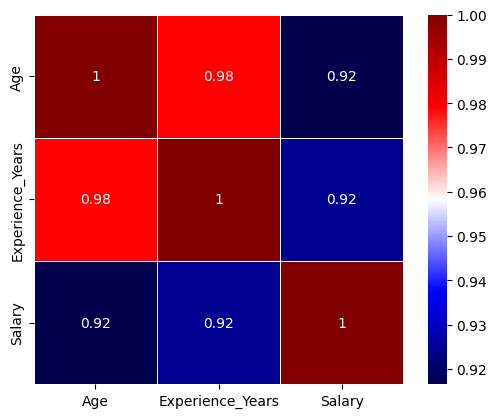

In [67]:
corr = df1[["Age", "Experience_Years", "Salary"]].corr()
sns.heatmap(corr, annot=True, square=True, linewidths=0.5, cmap="seismic")

**Data Visualization**

<Axes: xlabel='Degree'>

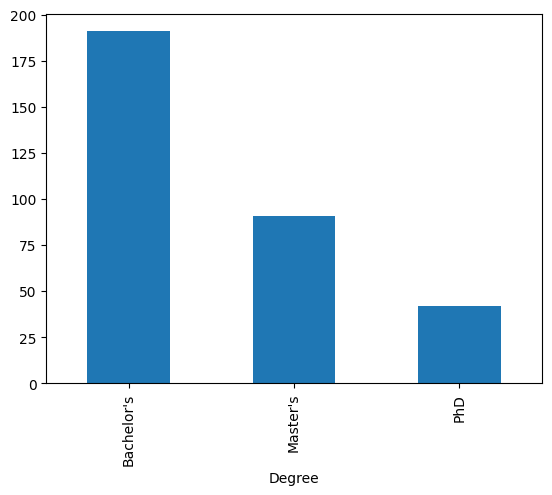

In [68]:
df1["Degree"].value_counts().plot(kind="bar")

<Axes: xlabel='Experience_Years'>

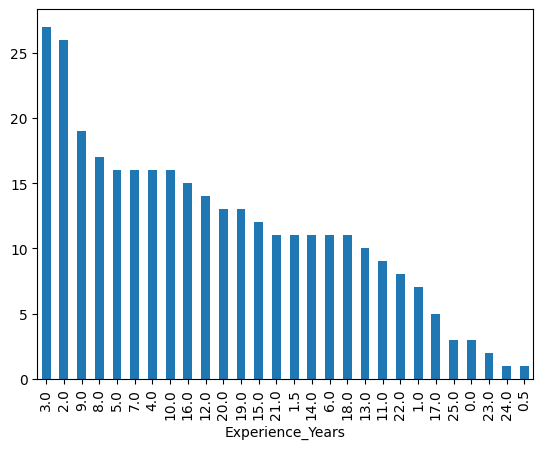

In [69]:
df1["Experience_Years"].value_counts().plot(kind="bar")

In [70]:
df1["Job_Title"].value_counts()

Job_Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

<Axes: ylabel='Frequency'>

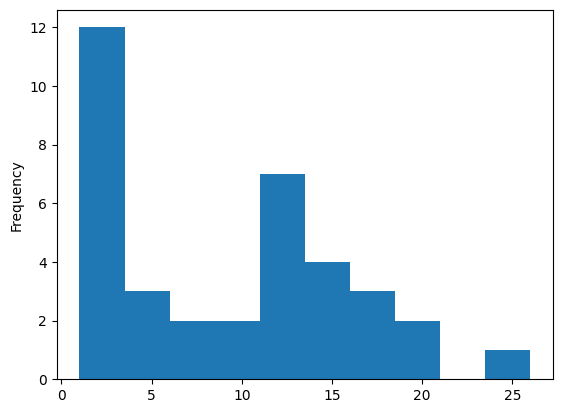

In [71]:
df1["Salary"].value_counts().plot(kind="hist")

In [72]:
df1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**=====> We need to convert categorical labels into a numerical form that can be used by ML Algorithm**

**Label Encoding**

*   We can use one-hot-encoding
*   Or LabelEncoder



In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [74]:
df1["Gender_Encoded"] = encoder.fit_transform(df1["Gender"])
df1

<ipython-input-74-98c39107452e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Gender_Encoded"] = encoder.fit_transform(df1["Gender"])


,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Gender_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0
4,52.0,Male,Master's,Director,20.0,200000.0,1
...,...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0,0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0,1
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0,0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0,1


In [75]:
df1["Degree_Encoded"] = encoder.fit_transform(df1["Degree"])

<ipython-input-75-599af5a719ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Degree_Encoded"] = encoder.fit_transform(df1["Degree"])


In [76]:
df1["Job_Title_Encoded"] = encoder.fit_transform(df1["Job_Title"])

<ipython-input-76-866a29d7ad3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Job_Title_Encoded"] = encoder.fit_transform(df1["Job_Title"])


**Data after Label Encoding**

In [77]:
df1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Gender_Encoded,Degree_Encoded,Job_Title_Encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


**Feature Scaling**

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
df1["Age_Scaled"] = scaler.fit_transform(df1[["Age"]])
df1["Experience_Years_Scaled"] = scaler.fit_transform(df1[["Experience_Years"]])

<ipython-input-79-c93b765c67f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Age_Scaled"] = scaler.fit_transform(df1[["Age"]])
<ipython-input-79-c93b765c67f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Experience_Years_Scaled"] = scaler.fit_transform(df1[["Experience_Years"]])


In [80]:
df1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Gender_Encoded,Degree_Encoded,Job_Title_Encoded,Age_Scaled,Experience_Years_Scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


# Data Splitting

In [81]:
X = df1.loc[:,["Age_Scaled", "Gender_Encoded", "Degree_Encoded","Job_Title_Encoded","Experience_Years_Scaled"]]
X.head()

,Age_Scaled,Gender_Encoded,Degree_Encoded,Job_Title_Encoded,Experience_Years_Scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


In [89]:
Y = df1["Salary"]
Y.isnull().sum()

0

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=42)

In [91]:
X_train.isnull().sum()
Y_train.isnull().sum()

0

## Model Development

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
model = LinearRegression()

**Model Training**

In [92]:
model.fit(X_train, Y_train)

LinearRegression()

**Model Prediction**

In [93]:
Y_predicts = model.predict(X_test)
Y_predicts

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [94]:
diff = pd.DataFrame({"Y_Actual": Y_test, "Y_Predicted": Y_predicts})
diff

,Y_Actual,Y_Predicted
132,100000.0,117415.913446
108,100000.0,125562.807428
137,50000.0,48965.153862
9,110000.0,128739.348880
181,105000.0,106828.499305
...,...,...
104,80000.0,117279.788471
233,85000.0,83396.821876
60,170000.0,177743.761029
94,75000.0,72275.144274


**Model Evaluation**

In [95]:
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error, mean_squared_error

r2 = r2_score(Y_test, Y_predicts)
print(f"r2_score = {r2}")

r2_score = 0.8911231066517089


In [98]:
mse = mean_squared_error(Y_test, Y_predicts)
print(f"Mean Squred Error = {mse}")

Mean Squred Error = 205754135.717261


In [99]:
mae = mean_absolute_error(Y_test, Y_predicts)
print(f"Mean Absolute Error = {mae}")

Mean Absolute Error = 10570.78640113617


# Customize Prediction

In [104]:
from math import trunc
Age1 = 2.037324
Gender1 = 1
Degree1 = 2
Experience1 = 0.744158
Job1 = 159

emp_salary = model.predict([[Age1, Gender1, Degree1, Job1, Experience1]])
print(f"Salary predicted = {trunc(emp_salary[0])}")

Salary predicted = 182756


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
